In [ ]:
!nvidia-smi

Sun Sep  4 20:08:25 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
# Installing latest FastAI library
! [ -e /content ] && pip install -Uqq fastbook
import fastbook

# Import necesssary libraries
from fastbook import *
from fastai.vision.widgets import *

     |████████████████████████████████| 719 kB 22.4 MB/s 
     |████████████████████████████████| 1.3 MB 56.2 MB/s 
     |████████████████████████████████| 4.7 MB 68.3 MB/s 
     |████████████████████████████████| 365 kB 72.9 MB/s 
     |████████████████████████████████| 115 kB 75.3 MB/s 
     |████████████████████████████████| 120 kB 74.3 MB/s 
     |████████████████████████████████| 212 kB 63.2 MB/s 
     |████████████████████████████████| 127 kB 42.2 MB/s 
     |████████████████████████████████| 6.6 MB 57.9 MB/s 


In [ ]:
# Install Browser ready tools
!pip install -Uqq fastai duckduckgo_search

# Import necesssary libraries
from duckduckgo_search import ddg_images
from fastcore.all import *

     |████████████████████████████████| 96 kB 5.7 MB/s 
     |████████████████████████████████| 62 kB 1.5 MB/s 
     |████████████████████████████████| 357 kB 67.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 1.1.4 requires click<8.0,>=5.1, but you have click 8.1.3 which is incompatible.


In [ ]:
def search_images(term, max_images=30):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [ ]:
urls = search_images('gala apples', max_images=2)
urls[1]

Searching for 'gala apples'


'https://i5.walmartimages.com/asr/f46d4fa7-6108-4450-a610-cc95a1ca28c5_3.38c2c5b2f003a0aafa618f3b4dc3cbbd.jpeg'

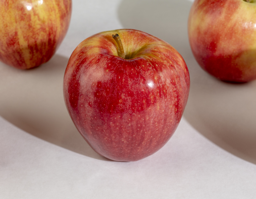

In [ ]:
from fastdownload import download_url
dest = 'gala.jpg'
download_url(urls[0], dest, show_progress=False)

from fastai.vision.all import *
im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'fuji apples'


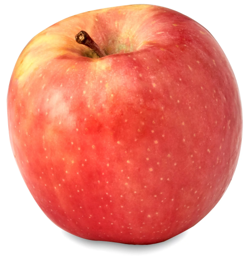

In [ ]:
download_url(search_images('fuji apples', max_images=1)[0], 'fuji.jpg', show_progress=False)
Image.open('fuji.jpg').to_thumb(256,256)

In [ ]:
searches = 'gala apples','fuji apples' # 'gala apples', 'fuji'
path = Path('apples_dataset')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo')) # 'gala apples small size'
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'{o} honey photo'))
    sleep(10)
    download_images(dest, urls=search_images(f'{o} shade photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'gala apples photo'
Searching for 'gala apples honey photo'
Searching for 'gala apples shade photo'
Searching for 'fuji apples photo'
Searching for 'fuji apples honey photo'
Searching for 'fuji apples shade photo'


In [ ]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

1